# 训练首个神经网络：基本分类

本指南会训练一个对服饰（例如运动鞋和衬衫）图像进行分类的神经网络模型。即使您不了解所有细节也没问题，本教程简要介绍了完整的 TensorFlow 程序，而且我们会在后面详细介绍。

本指南使用的是 tf.keras，它是一种在 TensorFlow 中构建和训练模型的高阶 API。

In [1]:
#tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras

# helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.12.0


## 导入Fashion MNIST 数据集

本指南使用 Fashion MNIST 数据集，其中包含 70000 张灰度图像，涵盖 10 个类别。以下图像显示了单件服饰在较低分辨率（28x28 像素）下的效果：

![Fashion-MNIST 样本](https://tensorflow.org/images/fashion-mnist-sprite.png?hl=zh-cn)

Fashion MNIST 的作用是成为经典 MNIST 数据集的简易替换，后者通常用作计算机视觉机器学习程序的“Hello, World”入门数据集。MNIST 数据集包含手写数字（0、1、2 等）的图像，这些图像的格式与我们在本教程中使用的服饰图像的格式相同。

本指南使用 Fashion MNIST 实现多样化，并且它比常规 MNIST 更具挑战性。这两个数据集都相对较小，用于验证某个算法能否如期正常运行。它们都是测试和调试代码的良好起点。

我们将使用 60000 张图像训练网络，并使用 10000 张图像评估经过学习的网络分类图像的准确率。您可以从 TensorFlow 直接访问 Fashion MNIST，只需导入和加载数据即可：



In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


加载数据集会返回 4 个 NumPy 数组：

- train_images 和 train_labels 数组是训练集，即模型用于学习的数据。
- 测试集 test_images 和 test_labels 数组用于测试模型。

| 标签 | 	类别 |
| ---- | ----- |
|0	| T 恤衫/上衣
|1	| 裤子|
|2	| 套衫|
|3	| 裙子|
|4	| 外套|
|5	| 凉鞋|
|6	| 衬衫|
|7	| 运动鞋|
|8	| 包包|
|9	| 踝靴|

每张图像都映射到一个标签。由于数据集中不包含类别名称，因此将它们存储在此处，以便稍后在绘制图像表时使用：

In [3]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
              'Sandal','Shirt','Sneaker','Bag','Ankle boot']


## 探索数据

我们先探索数据集的格式，然后再训练模型。以下内容显示训练集中有 60000 张图像，每张图像都表示为 28x28 像素：

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
#同样，训练集中有 60000 个标签：
len(train_labels)

60000

In [6]:
#每个标签都是一个介于 0 到 9 之间的整数：
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
# 测试集中有 10000 张图像。同样，每张图像都表示为 28x28 像素：
test_images.shape

(10000, 28, 28)

In [8]:
# 测试集中有 10000 个图像标签：
len(test_labels)

10000

## 预处理数据

必须先对数据进行预处理，然后再训练网络。如果您检查训练集中的第一张图像，就会发现像素值介于 0 到 255 之间：

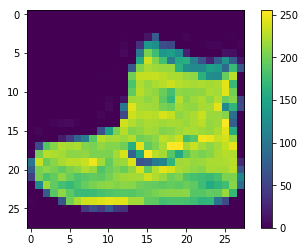

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar() # 显示color栏
plt.grid(False) # 是否显示格子线

我们将这些值缩小到 0 到 1 之间，然后将其馈送到神经网络模型。为此，将图像组件的数据类型从整数转换为浮点数，然后除以 255。以下是预处理图像的函数：

务必要以相同的方式对训练集和测试集进行预处理：

In [14]:
train_images = train_images / 255.0

test_images = test_images / 255.0

显示训练集中的前 25 张图像，并在每张图像下显示类别名称。验证确保数据格式正确无误，然后我们就可以开始构建和训练网络了。

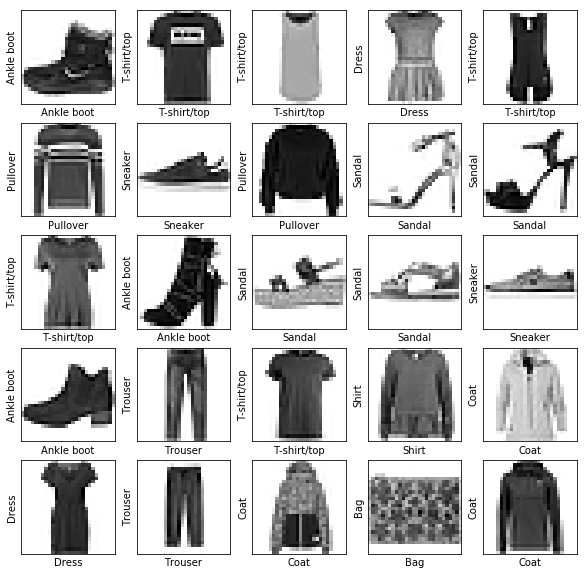

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)#?
    plt.xticks([])#?
    plt.yticks([])#?
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]]) # 在x轴上显示文字
    #plt.ylabel(class_names[train_labels[i]]) # 在y轴上显示文字    

## 构建模型

构建神经网络需要先配置模型的层，然后再编译模型。

### 设置层

神经网络的基本构造块是层。层从馈送到其中的数据中提取表示结果。希望这些表示结果有助于解决手头问题。

大部分深度学习都会把简单的层连在一起。大部分层（例如 tf.keras.layers.Dense）都具有在训练期间要学习的参数。

In [21]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),#从二维数组转为一维
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax),
])

该网络中的第一层 tf.keras.layers.Flatten 将图像格式从二维数组（28x28 像素）转换成一维数组（28 * 28 = 784 像素）。可以将该层视为图像中像素未堆叠的行，并排列这些行。该层没有要学习的参数；它只改动数据的格式。

在扁平化像素之后，该网络包含两个 tf.keras.layers.Dense 层的序列。这些层是密集连接或全连接神经层。第一个 Dense 层具有 128 个节点（或神经元）。第二个（也是最后一个）层是具有 10 个节点的 softmax 层，该层会返回一个具有 10 个概率得分的数组，这些得分的总和为 1。每个节点包含一个得分，表示当前图像属于 10 个类别中某一个的概率。

### 编译模型

模型还需要再进行几项设置才可以开始训练。这些设置会添加到模型的编译步骤：

- 损失函数 - 衡量模型在训练期间的准确率。我们希望尽可能缩小该函数，以“引导”模型朝着正确的方向优化。
- 优化器 - 根据模型看到的数据及其损失函数更新模型的方式。
- 指标 - 用于监控训练和测试步骤。以下示例使用准确率，即图像被正确分类的比例。

In [22]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

## 训练模型

训练神经网络模型需要执行以下步骤：

1. 将训练数据馈送到模型中，在本示例中为 train_images 和 train_labels 数组。
2. 模型学习将图像与标签相关联。
3. 我们要求模型对测试集进行预测，在本示例中为 test_images 数组。我们会验证预测结果是否与 test_labels 数组中的标签一致。

要开始训练，请调用 model.fit 方法，使模型与训练数据“拟合”：

In [23]:
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.4968 - acc: 0.8253
Epoch 2/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.3760 - acc: 0.8641
Epoch 3/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.3364 - acc: 0.8774
Epoch 4/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.3116 - acc: 0.8863
Epoch 5/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.2944 - acc: 0.8912


在模型训练期间，系统会显示损失和准确率指标。该模型在训练数据上的准确率达到 0.88（即 88%）。

## 评估准确率

接下来，比较一下模型在测试数据集上的表现：

In [24]:
test_loss, test_acc = model.evaluate(test_images,test_labels)
print('Test accuracy: ',test_acc)

10000/10000 [==============================] - 0s 24us/step
Test accuracy:  0.8739


结果表明，模型在测试数据集上的准确率略低于在训练数据集上的准确率。训练准确率和测试准确率之间的这种差异表示出现过拟合。如果机器学习模型在新数据上的表现不如在训练数据上的表现，就表示出现过拟合。

## 做出预测

模型经过训练后，我们可以使用它对一些图像进行预测。

In [25]:
predictions = model.predict(test_images)

在本示例中，模型已经预测了测试集中每张图像的标签。我们来看看第一个预测：

In [26]:
predictions[0]

array([1.3282850e-06, 5.3717613e-08, 2.3110479e-07, 1.5357775e-08,
       1.5224484e-07, 4.6080938e-03, 5.8635783e-07, 6.1655375e-03,
       2.7615819e-05, 9.8919642e-01], dtype=float32)

预测结果是一个具有 10 个数字的数组。这些数字说明模型对于图像对应于 10 种不同服饰中每一个服饰的“置信度”。我们可以看到哪个标签的置信度值最大：

In [27]:
np.argmax(predictions[0])

9

因此，模型非常确信这张图像是踝靴或属于 class_names[9]。我们可以检查测试标签以查看该预测是否正确：

In [28]:
test_labels[0]

9

我们可以将该预测绘制成图来查看全部 10 个通道

In [29]:
def plot_image(i,predictions_array,true_label,img):
    predictions_array,true_label,img=predictions_array[i],true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img,cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label],
                                        color))

def plot_value_array(i,predictions_array,true_label):
    predictions_array,true_label = predictions_array[i],true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10),predictions_array,color='#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')



我们来看看第 0 张图像、预测和预测数组。

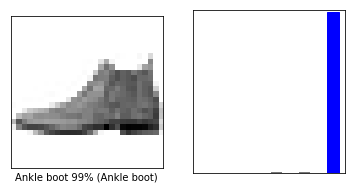

In [30]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)

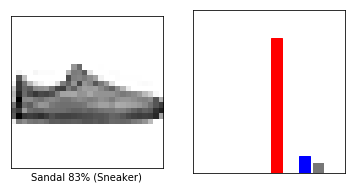

In [31]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

我们用它们的预测绘制几张图像。正确的预测标签为蓝色，错误的预测标签为红色。数字表示预测标签的百分比（总计为 100）。请注意，即使置信度非常高，也有可能预测错误。

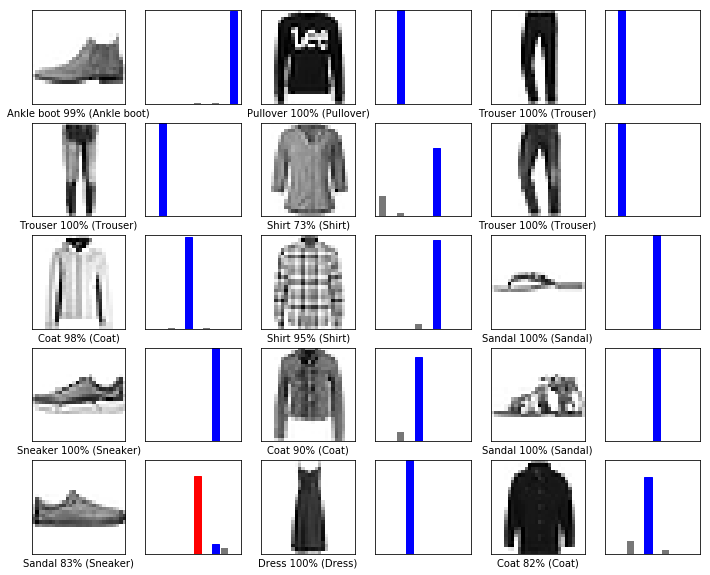

In [35]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red

num_rows =5
num_cols =3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i,predictions,test_labels,test_images)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i,predictions,test_labels)

最后，使用经过训练的模型对单个图像进行预测。

In [36]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


tf.keras 模型已经过优化，可以一次性对样本批次或样本集进行预测。因此，即使我们使用单个图像，仍需要将其添加到列表中：

In [37]:
# add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)


(1, 28, 28)


现在，预测这张图像：

In [38]:
predictions_single = model.predict(img)
print(predictions_single)

[[1.3282838e-06 5.3717613e-08 2.3110502e-07 1.5357775e-08 1.5224498e-07
  4.6080980e-03 5.8635828e-07 6.1655408e-03 2.7615872e-05 9.8919642e-01]]


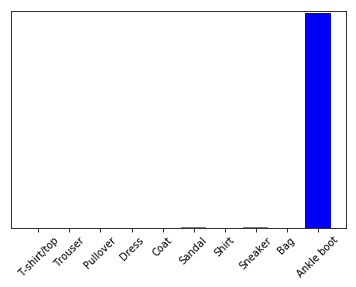

In [39]:
plot_value_array(0,predictions_single,test_labels)
_ = plt.xticks(range(10),class_names,rotation=45)

model.predict 返回一组列表，每个列表对应批次数据中的每张图像。（仅）获取批次数据中相应图像的预测结果：

In [40]:
np.argmax(predictions_single[0])

9

和刚才一样，模型预测的标签为 9。